# Data Analytics

## Import libraries and Dataset

In [1]:
# Declare variables
DF_PATH = r"C:\Users\PC\DataCamp\Nautical_Boat_website\nautical_boat_website\data\processed\boat_data_cleaned.pkl"


In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_pickle(DF_PATH)

In [4]:
df.head()

,price_eur,boat_type,manufacturer,year_built,length,width,material,location,views,country,waterway,condition,fuel
0,3403.74,Motor Yacht,Rigiflex power boats,2017-01-01,4.00,1.90,not defined,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,Switzerland,Lake Geneva,new boat from stock,not defined
1,3490.00,Center console boat,Terhi power boats,2020-01-01,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,Germany,BÃ¶nningstedt,new boat from stock,not defined
2,3845.40,Sport Boat,Marine power boats,NaT,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,Switzerland,Lake of Zurich,new boat from stock,not defined
3,3367.00,Sport Boat,Pioner power boats,2020-01-01,3.00,1.00,not defined,Denmark Â» Svendborg,64,Denmark,Svendborg,new boat from stock,not defined
4,3399.00,Fishing Boat,Linder power boats,2019-01-01,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,Germany,Bayern,new boat from stock,not defined


-------
# Price


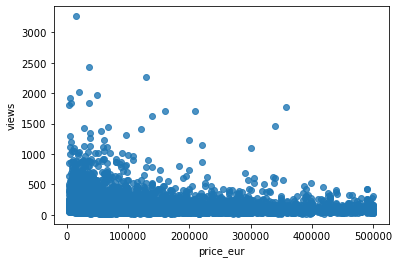

In [5]:
sns.regplot(data=df.query("price_eur < 500000"),x="price_eur",y="views",fit_reg=False);

In [6]:
df.price_eur.describe()

count    9.888000e+03
mean     3.032623e+05
std      9.721163e+05
min      3.224000e+03
25%      4.300000e+04
50%      9.264959e+04
75%      2.488500e+05
max      3.100000e+07
Name: price_eur, dtype: float64

In [7]:
ranges = [1000,10000,100000,200000,500000,np.inf]
group_names = ["1k-10k","10k-100k","100k-200k","200k-500k","500k+"]
df["income_group"] = pd.cut(df["price_eur"],bins=ranges,labels=group_names)

In [8]:
df.income_group.value_counts()

10k-100k     4975
200k-500k    1759
100k-200k    1750
500k+        1125
1k-10k        279
Name: income_group, dtype: int64

<AxesSubplot:xlabel='income_group'>

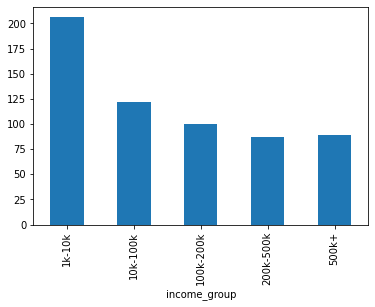

In [9]:
df.groupby("income_group").views.median().plot(kind="bar")

In [10]:
df.groupby("income_group").views.agg([])

""


-------
# boat_type


In [11]:
df.boat_type = df.boat_type.str.split(",",expand=True)[0]

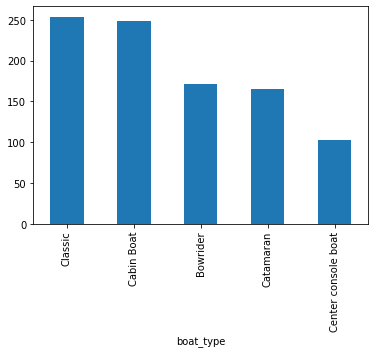

In [12]:
df.groupby("boat_type").views.mean()[:5].sort_values(ascending=False).plot(kind="bar");

In [13]:
top_5_types = df.groupby("boat_type").views.mean()[:5].index
new_df = df.groupby(["boat_type","income_group"]).views.mean().to_frame().reset_index()
new_df

,boat_type,income_group,views
0,Bowrider,1k-10k,477.333333
1,Bowrider,10k-100k,160.333333
2,Bowrider,100k-200k,232.760000
3,Bowrider,200k-500k,292.500000
4,Bowrider,500k+,NaN
...,...,...,...
125,Working Boat,1k-10k,104.833333
126,Working Boat,10k-100k,154.687500
127,Working Boat,100k-200k,119.800000
128,Working Boat,200k-500k,NaN


In [32]:
new_df.query("boat_type in @top_5_types")

,boat_type,income_group,views
0,Bowrider,1k-10k,477.333333
1,Bowrider,10k-100k,160.333333
2,Bowrider,100k-200k,232.760000
3,Bowrider,200k-500k,292.500000
4,Bowrider,500k+,NaN
5,Cabin Boat,1k-10k,418.434783
6,Cabin Boat,10k-100k,240.140039
7,Cabin Boat,100k-200k,211.471429
8,Cabin Boat,200k-500k,228.035714
9,Cabin Boat,500k+,191.666667


No handles with labels found to put in legend.


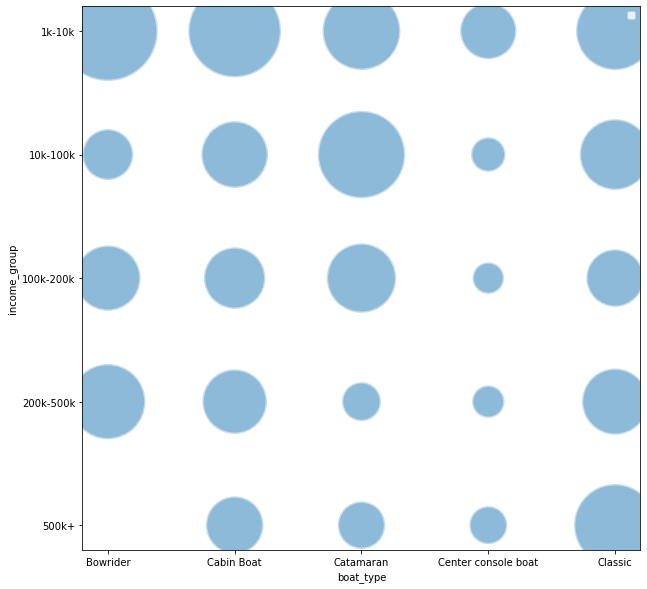

In [31]:
fig,ax = plt.subplots(figsize=(10,10))

sns.scatterplot(data= new_df.query("boat_type in @top_5_types"), x="boat_type",y="income_group",size="views",sizes=(1000,10000),legend=False, alpha=0.5)
plt.legend()

-------
# year


In [16]:
sns.scatterplot(data=df, x="year_built",y="views",hue="built_between")

ValueError: Could not interpret value `built_between` for parameter `hue`

In [ ]:
df["built_between"] = pd.qcut(df.year_built.dt.year,q=3)

In [ ]:
df.groupby("built_between").views.mean().plot(kind="bar")

In [ ]:
df.built_between.value_counts()

-------
# condition


In [ ]:
df.groupby("condition")["views"].mean().sort_values()

In [ ]:
order = df.groupby("condition")["views"].median().sort_values(ascending=True).index
sns.boxplot(data=df,x="views",y="condition",showfliers=False, order=order);

-------
# Area


In [ ]:
df_area = df.dropna(subset=["width","length"])

In [ ]:
# [s = (0.127, 22.44] < m = (22.44, 49.354] < l = (49.354, 1078.8]]
labels=["S","M","L"]
df_area["size"] = pd.qcut(df_area.area,q=3,labels=labels)
df_area["size"]

In [ ]:
sns.scatterplot(data=df_area, x="length",y="width",hue="size")

In [ ]:
sns.barplot(x="size",y="views",data=df_area)

-------
# country


In [ ]:
correct_countries = {"Switzerland" : ["Welschenrohr","Rolle","Avenches","Thalwil","Thun","Faoug","VierwaldstÃ¤ttersee - Buochs", "Lake Geneva"],
'Germany' : ["Neustadt in Holstein (Ostsee)","Steinwiesen","TravemÃ¼nde","Rheinfelden","Brandenburg","Brandenburg an derHavel","RÃ¼gen","24782 BÃ¼delsdorf","Greetsile/ KrummhÃ¶rn","ZÃ¼richse, 8855 Wangen SZ","baden baden","Stralsund","83278 Traunstein","waren mÃ¼ritz","Berlin Wannsee","Barssel","Beilngries","Bielefeld","Bremen","Heilbronn","Niederrhein","Rostock"
             "bodensee","Lake Constance"],
'Italy' : ["Lago Maggiore, Minusio","Lago Maggiore","lago maggiore","Angera","Tenero, lago Maggiore","Lago di Garda","Italien","Adrai","Italie","Porto Rotondo","Toscana"],
'Croatia' : ["Croatia (Hrvatska)","Split","Kroatien Krk","Novi Vinodolski","Dalmatien","Marina Punat","Rovinij"],
'Denmark' : ["Juelsminde Havn","PT Ã¸stkysten ellers Esbjerg"],
'France' : ["annecy","French Southern Territories","Martinique"],
'Belgium' : ["Opwijk","BelgiÃ«, Zulte","Lommel"],
'Spain' : ["Mallorca","Calanova Mallorca","espa?a","Ibiza"],
'Netherlands' : ["Wijdenes","Zevenbergen","Katwijk"],
'United_Kingdom' : ["Isle of Man","Jersey"],
'Slovenia' : ["Izola"],
'Austria' : ["Neusiedl am See","FuÃach"]}

In [ ]:
df.country.str.strip()
for country, city in correct_countries.items() :
    df.loc[df.country.isin(city),"country"] = str(country)

In [ ]:
df.country.nunique()

In [ ]:
df.country = df.country.str.strip()

In [ ]:
df.groupby("country")["views"].sum().sort_values(ascending=False)[:5].plot(kind="bar")

In [ ]:
df_country = df.groupby("country")["views"].sum().to_frame().reset_index()

In [ ]:
import plotly.express as px

fig = px.choropleth(df_country, locations='country', locationmode="country names", color='views',
                           color_continuous_scale="Viridis", scope = "europe",height=800,width=1200
                          )

fig.show()

In [ ]:
import plotly
print(plotly.express.colors)